## setup

In [2]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"
pd.set_option('display.max_rows', None)


In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(BASE_DIR)

In [4]:
DATA_PATH = BASE_DIR + '/data'

## plotting funcs

In [5]:
def plot_tlr_pos_for_construct(df, name, pos):
    df_sub = df[df['name'] == name]
    df_sub = df_sub.sort_values('mg_conc')
    plt.plot(df_sub['mg_conc'], df_sub['tlr'].apply(lambda x : x[pos-1]), marker='o', label=name)


def plot_tlr_pos_for_construct_norm(df, name, pos):
    df_sub = df[df['name'] == name]
    df_sub = df_sub.sort_values('mg_conc')
    data = []
    max_val = df_sub['tlr'].apply(lambda x : x[pos-1]).max()
    for i, row in df_sub.iterrows():
        data.append(row['tlr'][pos-1] / max_val)
    plt.plot(df_sub['mg_conc'], data, marker='o', label=name)

## dataframe setup

In [6]:
df = pd.read_json(f"{DATA_PATH}/mttr6_data_full.json")
df = df[~df["name"].isin(["CAUGA_UCUAAA", "UAUGG_CUUAAC", "UACGG_CCUACA", "CACGG_CCUCAC", "CAUGC_GCUCAA", "CAUGC_GCUGAA"])]
df = df[df["mg_conc"] != 5.0]

In [7]:
df.columns

Index(['name', 'sequence', 'structure', 'data_type', 'num_reads', 'num_aligns',
       'data', 'no_mut', '1_mut', '2_mut', '3_mut', '3plus_mut', 'sn', 'dir',
       'rna_name', 'run_name', 'exp_name', 'code', 'length', 'barcode',
       'barcode_seq', 'buffer', 'buffer_conc', 'mg_conc', 'exp_type', 'dg',
       'act_seq', 'act_ss', 'gaaa', 'gaaa_avg', 'ref_hp', 'aligned_seq',
       'inserts', 'deletes', 'mut_pos', 'muts', 'mg_1_2', 'n', 'tlr',
       'tlr_norm', 'tlr_in_5', 'tlr_in_3', 'tlr_in_6', 'tlr_in_7'],
      dtype='object')

In [22]:
data = []
for i, row in df.iterrows():
    row_data = {
        # info about the construct
        'name' : row['name'],   
        'act_seq' : row['act_seq'],
        'act_ss' : row['act_ss'],
        'dg': row['dg'],
        'aliged_seq' : row['aligned_seq'],
        # data about the construct
        'mg_conc' : row['mg_conc'],
        'gaaa_avg' : row['gaaa_avg'],
        'tlr' : row['tlr'],
        'tlr_norm' : row['tlr_norm'],
        'mg_1_2' : row['mg_1_2'],
        'ln_mg_1_2' : np.log(row['mg_1_2'])
    }
    row_data['num_inserts'] = len(row['inserts'])
    row_data['num_deletes'] = len(row['deletes'])
    row_data['num_muts'] = len(row['muts'])
    # write mut classifcition check to see if its harmless bp swap
    for pos, (nuc, val) in enumerate(zip(row['aligned_seq'], row['tlr'])):
        mut_data = row_data.copy()
        mut_data['pos'] = pos + 1
        mut_data['nuc'] = nuc
        mut_data['val'] = val
        mut_data['mut'] = False 
        if pos + 1 in row['mut_pos']:
            mut_data['mut'] = True
        data.append(mut_data)
df_muts = pd.DataFrame(data)

## pos 8

In [23]:
q1 = df_muts['num_inserts'] == 0
q2 = df_muts['num_deletes'] == 0
q3 = df_muts['pos'] == 8
q4 = df_muts['mut'] == False
df_sub = df_muts[q1 & q2 & q3 & q4]

### sort by mg 1/2

5947    CAUGG_CCUAAA
4902    CAGGG_CCUAAA
5056    CACGC_GCUAAA
6970    CAUGG_CCUACA
4022    CACGG_CCUAAA
Name: name, dtype: object


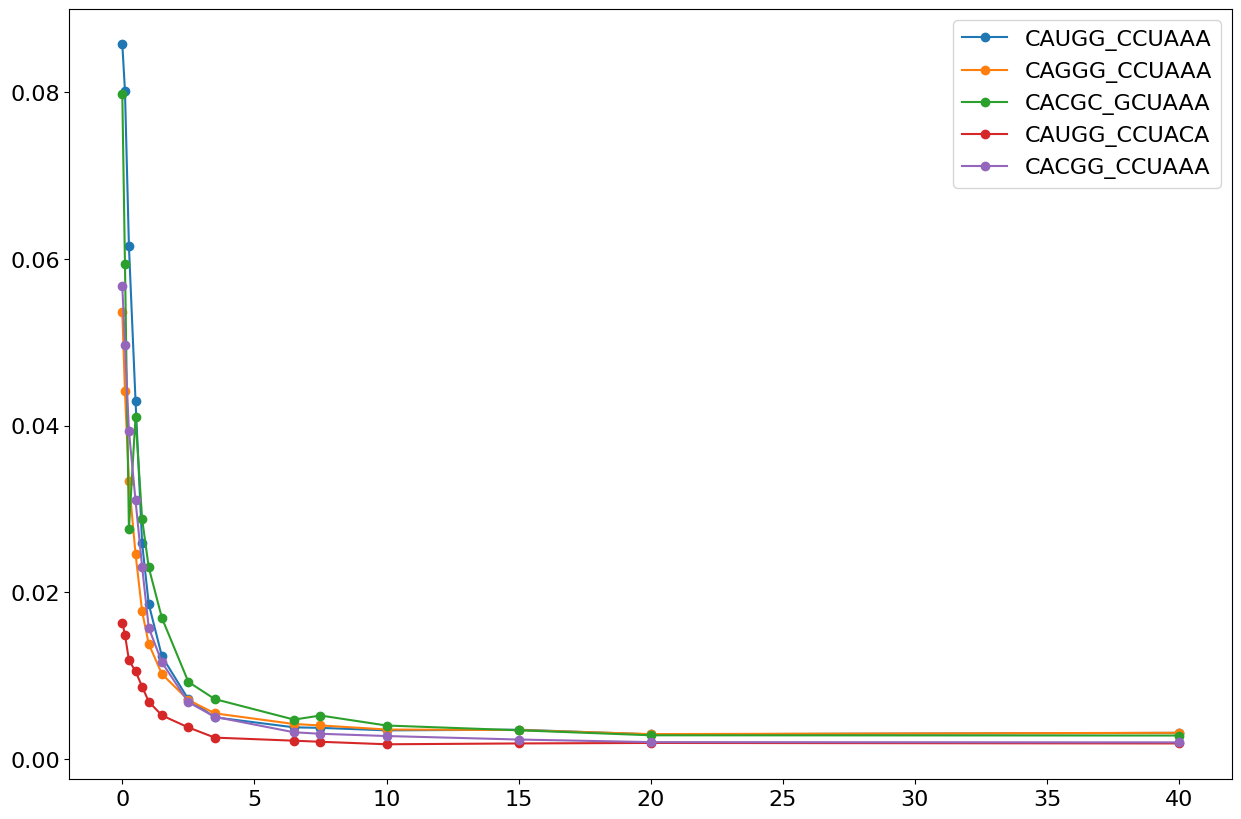

In [10]:
df_sorted = df_sub.sort_values("mg_1_2")
df_sorted = df_sorted.drop_duplicates(subset='name', keep='first')
for i, row in df_sorted[:5].iterrows():
    plot_tlr_pos_for_construct(df_sub, row['name'], 8)
plt.legend()
print(df_sorted['name'][:5])

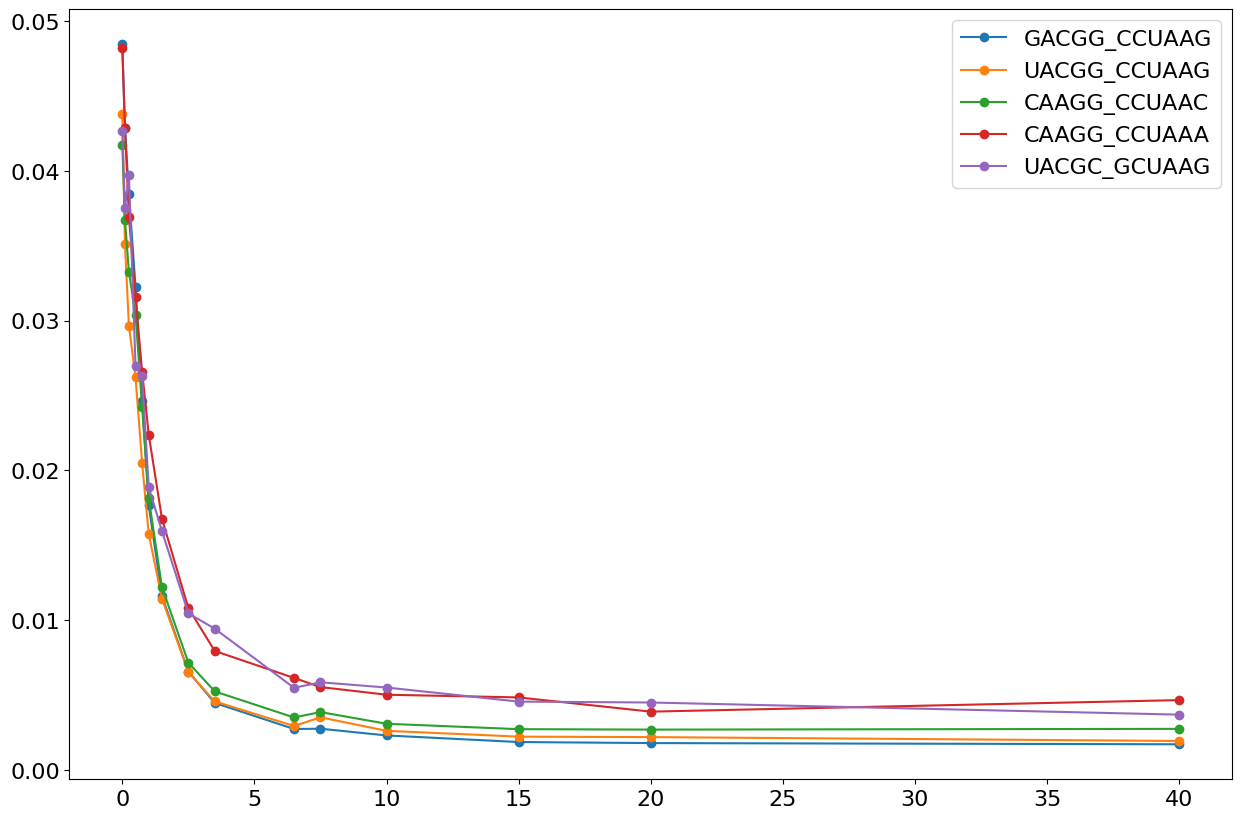

In [11]:

for i, row in df_sorted[5:10].iterrows():
    plot_tlr_pos_for_construct(df, row['name'], 8)
plt.legend()

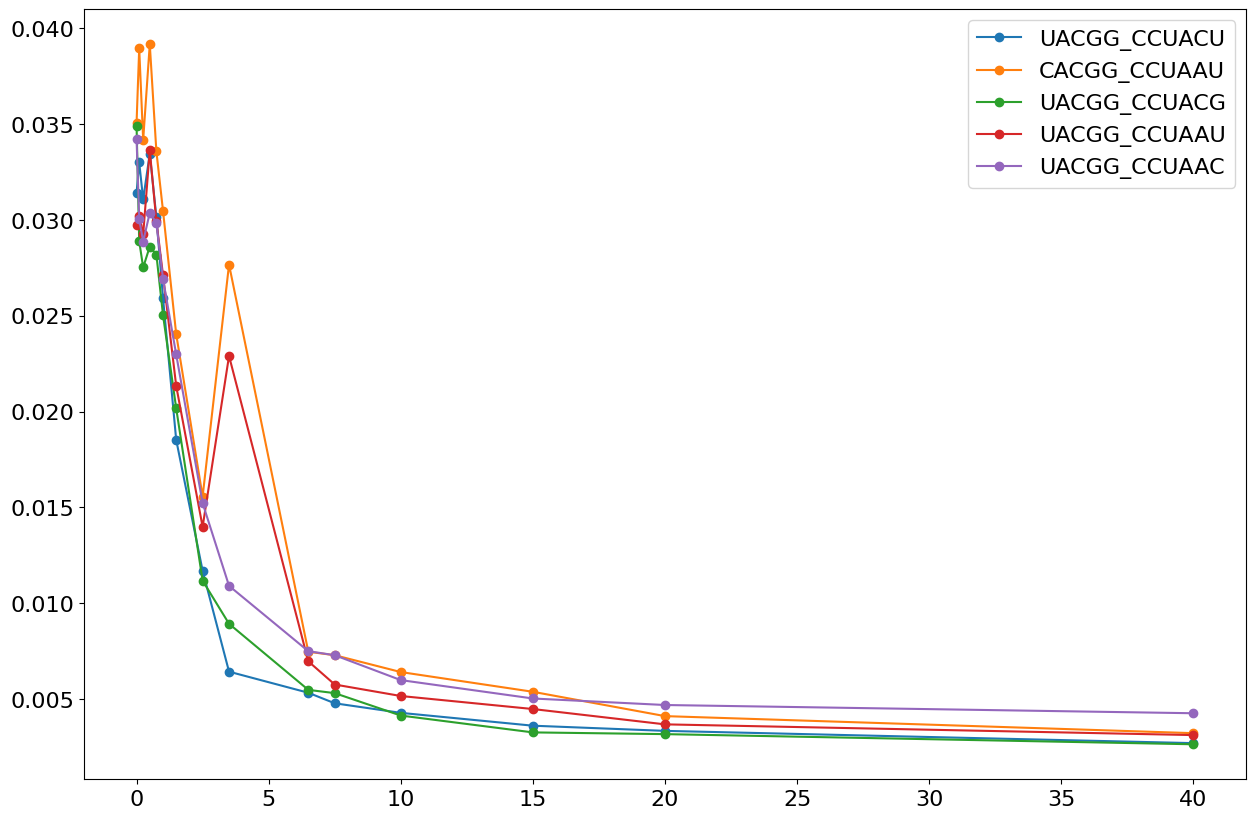

In [32]:

for i, row in df_sorted[10:15].iterrows():
    plot_tlr_pos_for_construct(df, row['name'], 8)
plt.legend()

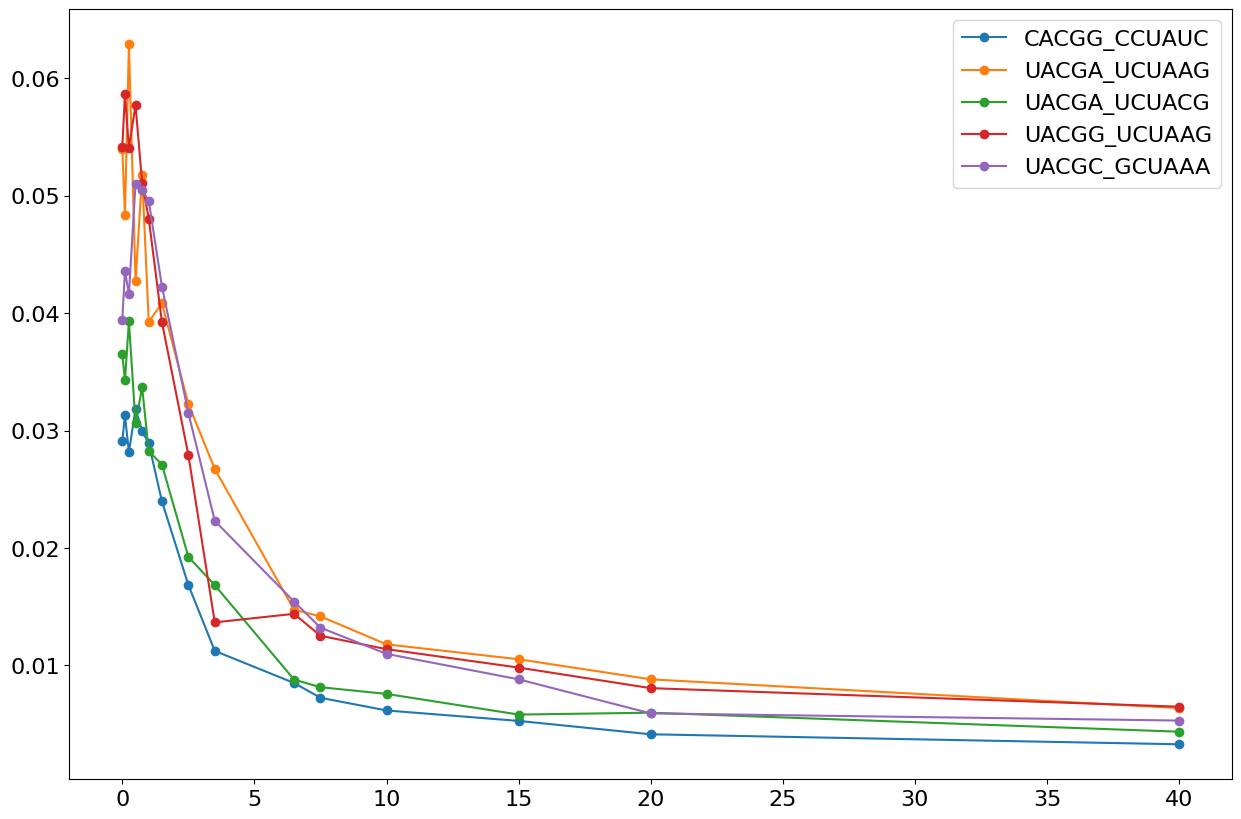

In [33]:

for i, row in df_sorted[20:25].iterrows():
    plot_tlr_pos_for_construct(df, row['name'], 8)
plt.legend()

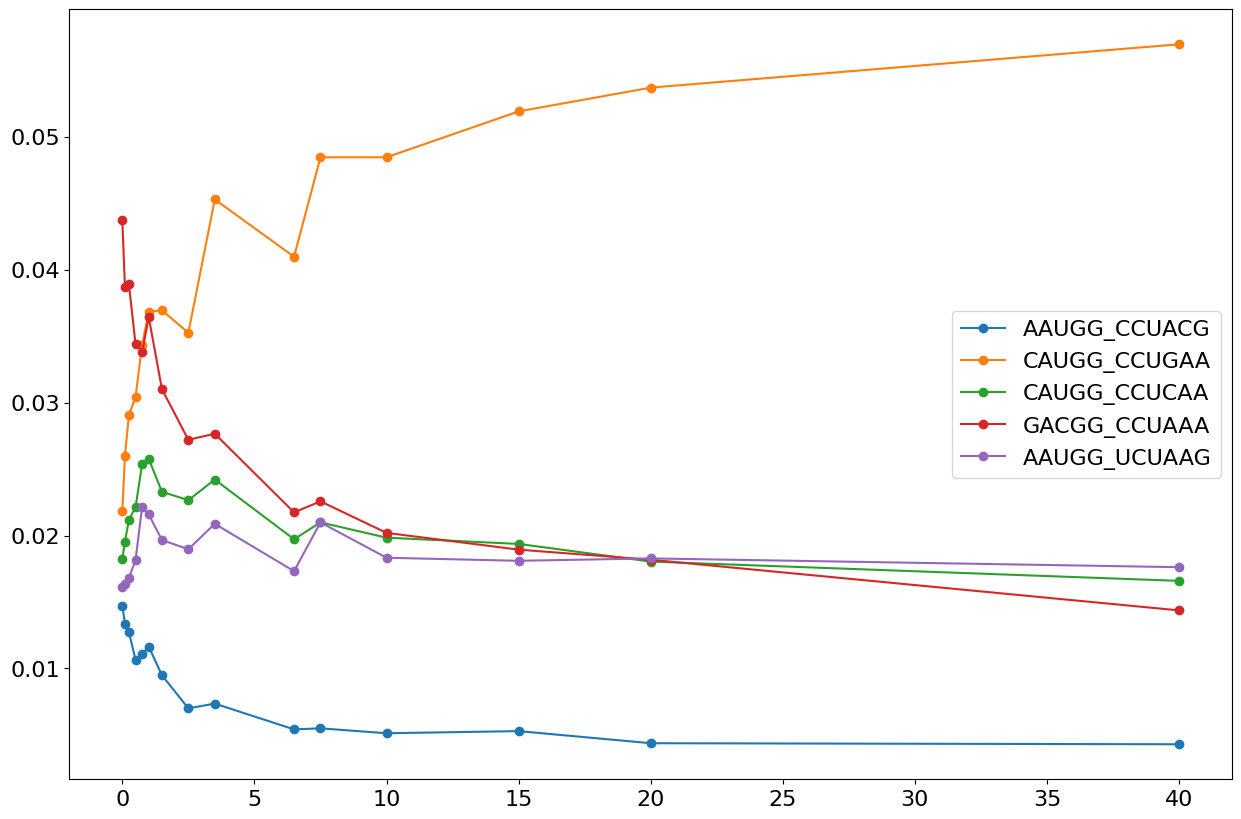

In [14]:

for i, row in df_sorted[-5:].iterrows():
    plot_tlr_pos_for_construct(df, row['name'], 8)
plt.legend()

### group by max value

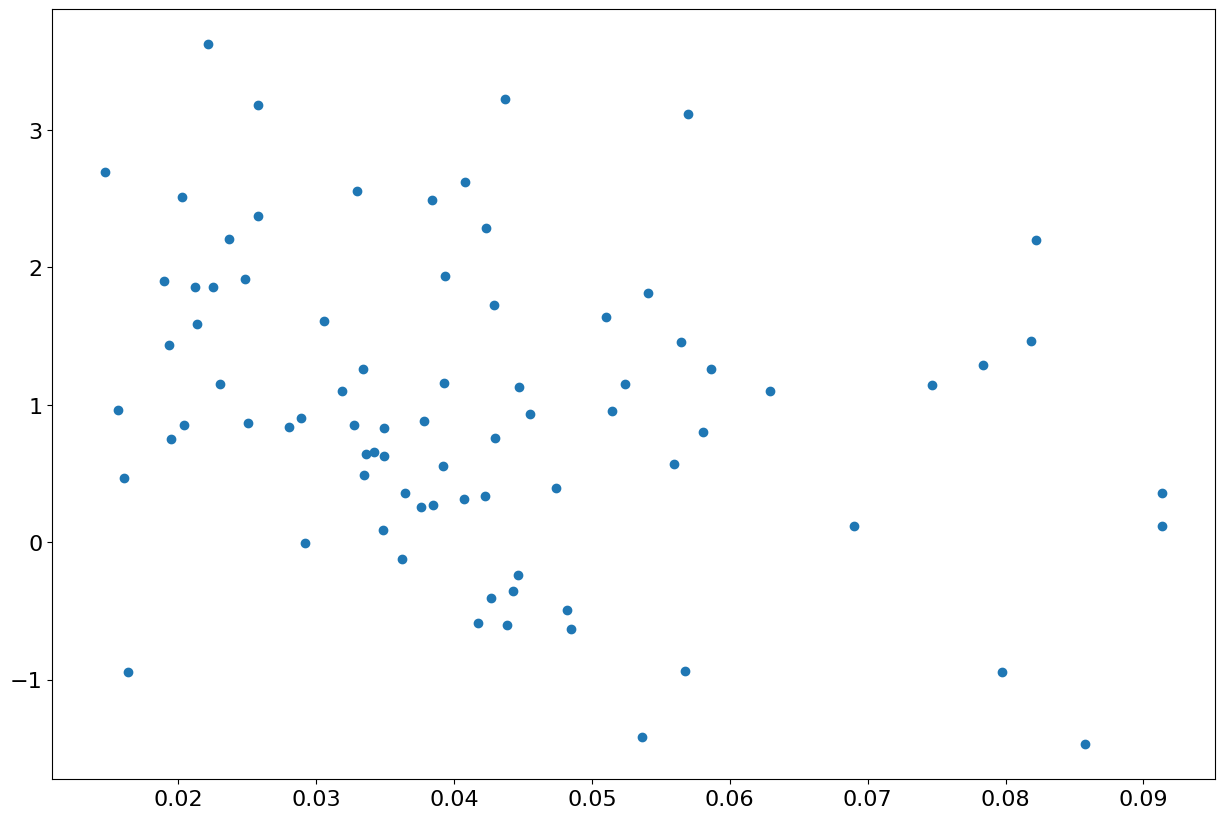

In [30]:
data = []
for i, g in df_sub.groupby('name'):
    max_val = g['tlr'].apply(lambda x : x[8-1]).max()
    data.append([i, max_val, g.iloc[0]['ln_mg_1_2']])
df_sub_2 = pd.DataFrame(data, columns=['name', 'max_val', 'ln_mg_1_2']).sort_values('max_val', ascending=False)
plt.scatter(df_sub_2['max_val'], df_sub_2['ln_mg_1_2'])

## pos 5

In [16]:
q1 = df_muts['num_inserts'] == 0
q2 = df_muts['num_deletes'] == 0
q3 = df_muts['pos'] == 5
q4 = df_muts['mut'] == False
df_sub = df_muts[q1 & q2 & q3 & q4]
df_sub['name'].unique()

array(['CACGG_CCUUAA', 'UAUGG_CCUCAC', 'CAUGG_CCUAAU', 'CAUGC_GCUUAA',
       'UAGGG_CCUAAC', 'CAUGG_CCUGAA', 'CAUGG_CCUCAA', 'GACGG_CCUAAA',
       'AAUGG_UCUAAG', 'CAAGG_CCUAAC', 'CAUGC_GCUAAA', 'CAUGU_ACUAAA',
       'CACGG_CCUAAA', 'CAUGG_CCUAAC', 'CACGG_CCUAAC', 'CAGGG_CCUAAA',
       'CACGC_GCUAAA', 'CAAGG_CCUAAA', 'GACGG_CCUAAG', 'CAUGG_CCUAAA',
       'UAUGG_CCUAAC', 'UACGG_CCUAAC', 'UACGG_CCUAAG', 'CAGGG_CCUAAC',
       'UACGA_UCUAAG', 'CAGGC_GCUAAA', 'UAUGG_UCUAAC', 'AACGG_CCUAAC',
       'AAUGG_CCUAAA', 'UACGC_GCUAAG', 'AAUGG_CCUAAC', 'GAUGG_CCUAAA',
       'CAUGU_ACUAAC', 'UACGG_CCUAAA', 'CAAGC_GCUAAA', 'CAUGG_CCUUAA',
       'CACGG_CCUAAG', 'AACGG_CCUAAA', 'UAAGG_CCUAAC', 'UACGG_CCUAAU',
       'AAUGG_CCUAAG', 'CACGG_CCUUAC', 'CACGG_CCUAAU', 'AAUGG_CCUGAC',
       'UACGC_GCUAAA', 'UACGG_UCUAAG'], dtype=object)

6087    CAUGG_CCUAAA
4800    CAGGG_CCUAAA
5108    CACGC_GCUAAA
4041    CACGG_CCUAAA
5680    GACGG_CCUAAG
Name: name, dtype: object


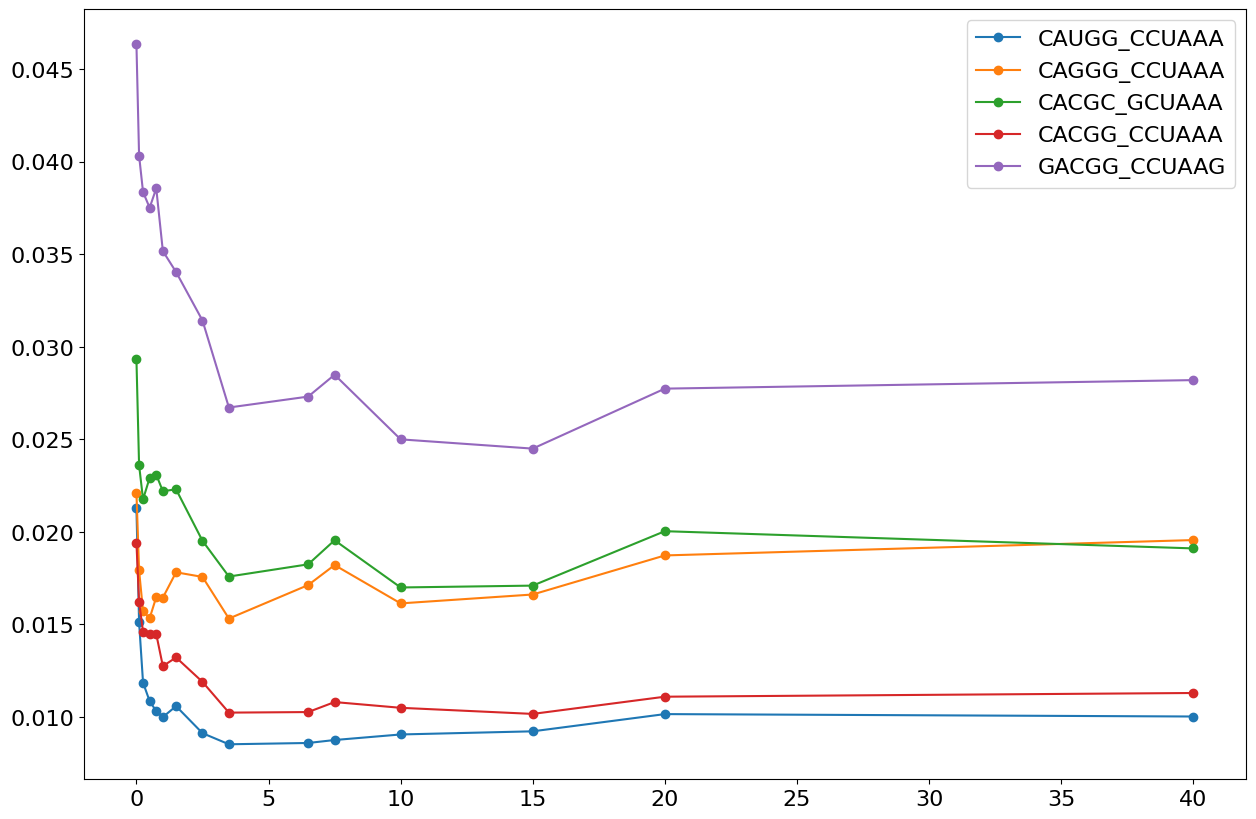

In [17]:
df_sorted = df_sub.sort_values("mg_1_2")
df_sorted = df_sorted.drop_duplicates(subset='name', keep='first')
for i, row in df_sorted[:5].iterrows():
    plot_tlr_pos_for_construct(df_sub, row['name'], 5)
plt.legend()
print(df_sorted['name'][:5])

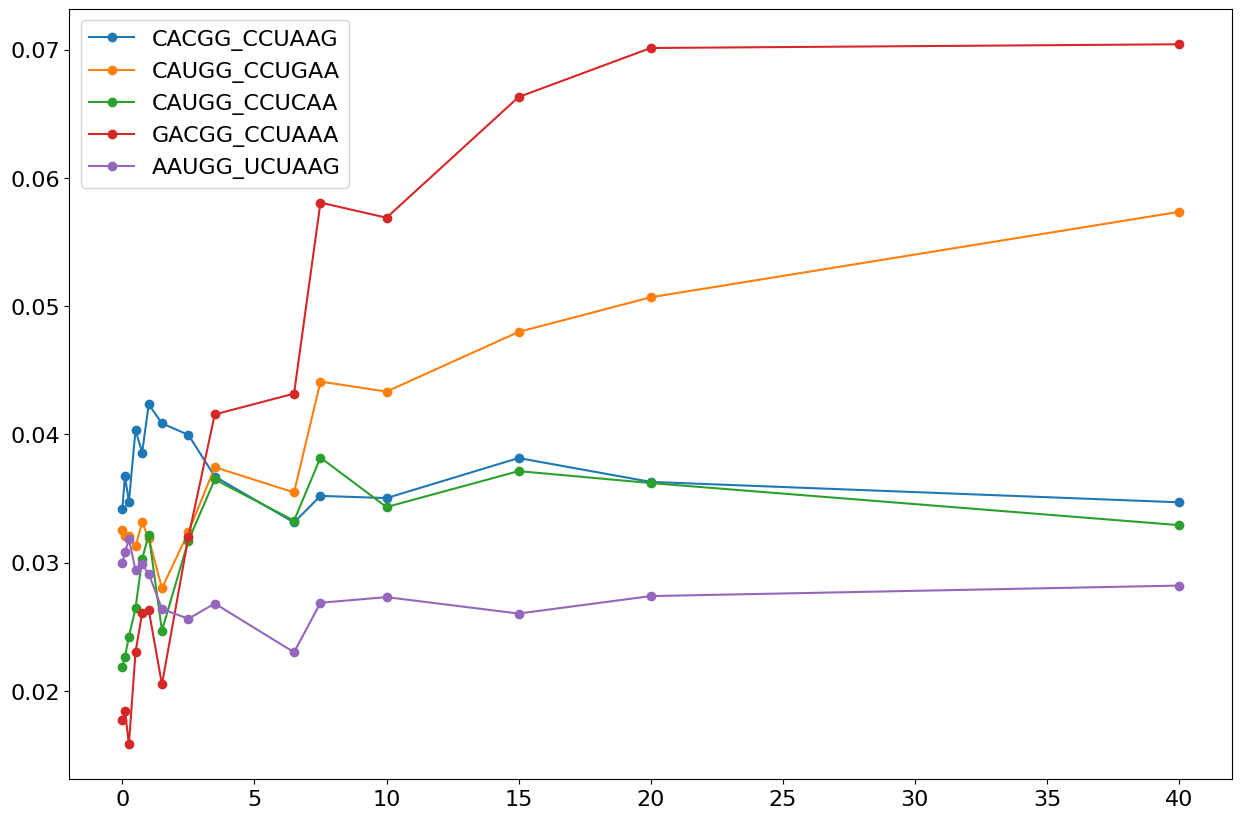

In [18]:
for i, row in df_sorted[-5:].iterrows():
    plot_tlr_pos_for_construct(df_sub, row['name'], 5)
plt.legend()

In [19]:
q1 = df_muts['num_inserts'] == 0
q2 = df_muts['num_deletes'] == 0
q3 = df_muts['pos'] == 9
q4 = df_muts['mut'] == True
q5 = df_muts['nuc'] == 'C'
df_sub = df_muts[q1 & q2 & q3 & q4 & q5]

## pos 9 mut to C

36
               name     dg    mg_1_2
12449  UACGG_CCUACU -10.13  1.635003
13604  CACGG_CCUAAU  -9.93  1.741089
5882   UACGG_CCUACG -10.71  1.878791
12372  UACGG_CCUAAU -10.14  1.895273
6597   UACGG_CCUAAC -10.69  1.933519


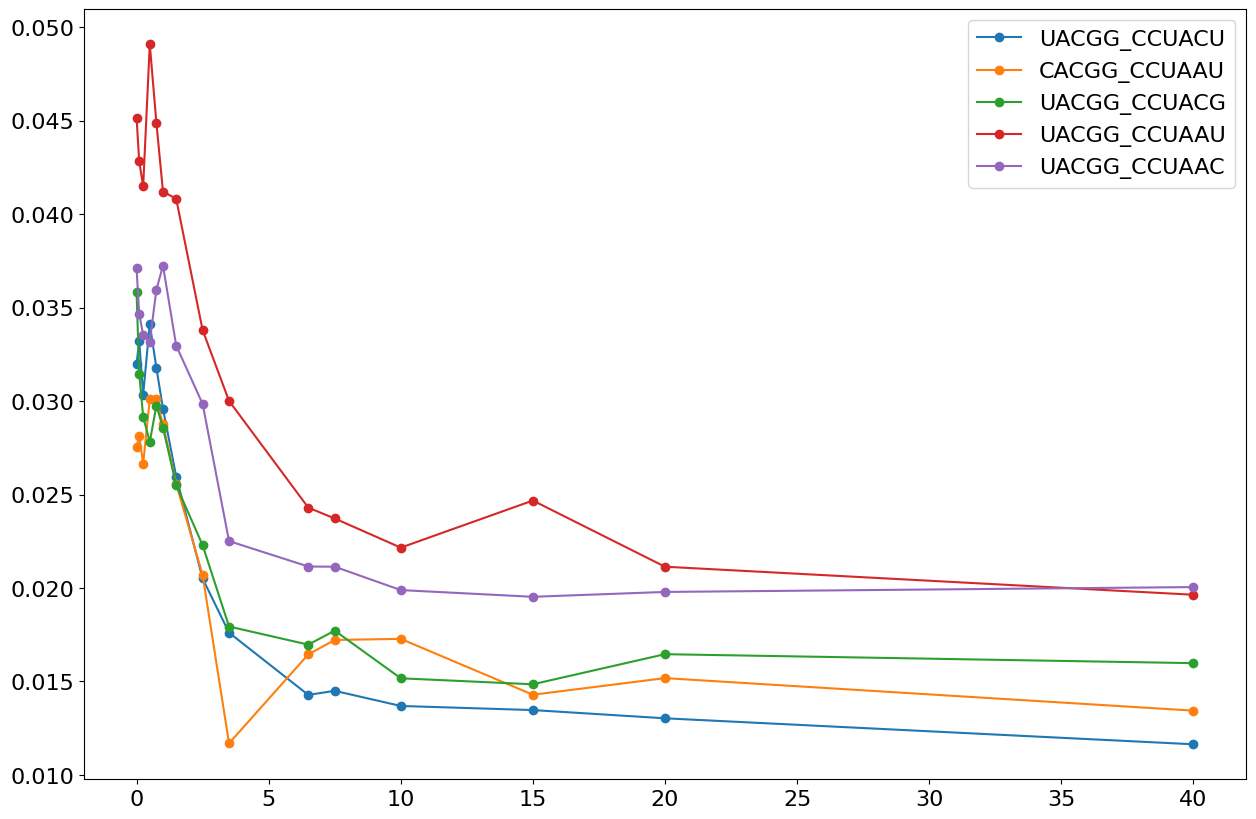

In [20]:
df_sorted = df_sub.sort_values("mg_1_2")
df_sorted = df_sorted.drop_duplicates(subset='name', keep='first')
print(len(df_sorted))
for i, row in df_sorted[10:15].iterrows():
    plot_tlr_pos_for_construct(df_sub, row['name'], 9)
plt.legend()
print(df_sorted[['name', 'dg', 'mg_1_2']][10:15])